In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

In [18]:
np.random.seed(123)

# real population (simulated)
height_pop = np.random.randint(40, 250, size=5000000)

height_pop_mean = np.mean(height_pop)
height_pop_std = np.std(height_pop)

print(f"{height_pop_mean=}")
print(f"{height_pop_std=}")

height_pop_mean=144.527873
height_pop_std=60.614232083693594


In [19]:
height_sample = np.random.choice(height_pop, size=1000)

height_sample_mean = np.mean(height_sample)
height_sample_std = np.std(height_sample)

print(f"{height_sample_mean=}")
print(f"{height_sample_std=}")

height_sample_mean=145.915
height_sample_std=61.3043047020354


In [20]:
bootstrap_means = []
n_trials = 1000000
for _ in range(n_trials):
    bootstrap_sample = np.random.choice(height_sample, replace=True, size=1000)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)
bootstrap_means = np.array(bootstrap_means)

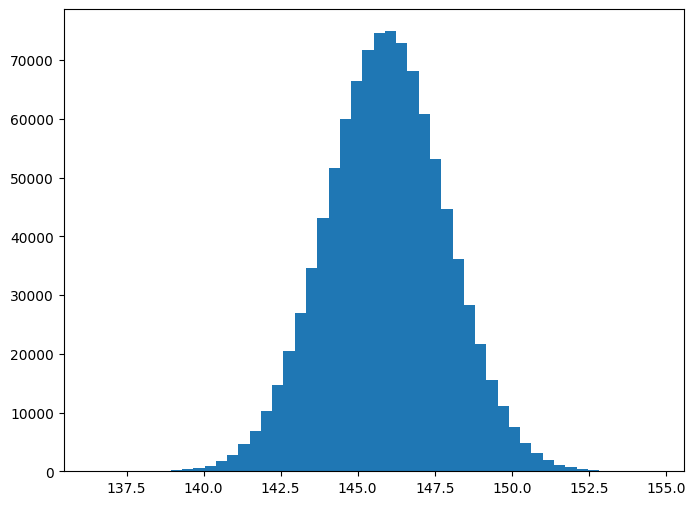

In [21]:
_ = plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=50)
plt.show()

In [22]:
estimated_mean = np.mean(bootstrap_means)
estimated_std = np.std(bootstrap_means)

print(f"{estimated_mean=}")
print(f"{height_pop_mean=}")
print(f"{estimated_std=}")
print(f"{height_pop_std=}")

estimated_mean=145.91655001300006
height_pop_mean=144.527873
estimated_std=1.9382869201717017
height_pop_std=60.614232083693594


In [23]:
confidence_intervals = np.percentile(bootstrap_means, [0.25, 97.5])
confidence_intervals

array([140.494, 149.716])

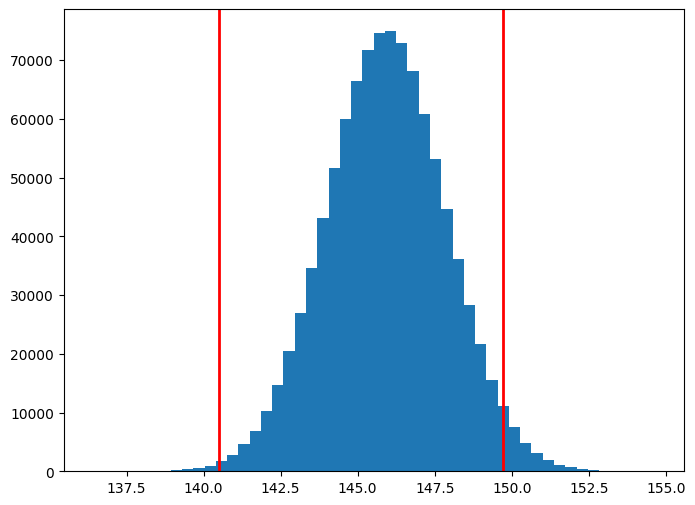

In [24]:
_ = plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=50)
plt.axvline(confidence_intervals[0], color='red', linewidth=2)
plt.axvline(confidence_intervals[1], color='red', linewidth=2)
plt.show()

In [26]:
# Test to see if the mean of the bootstraped means is the same as the popupation mean
import scipy.stats as sp  

t_statistic, p_value = sp.ttest_1samp(bootstrap_means, height_pop_mean)

print(f"{t_statistic=}")
print(f"{p_value=}")

t_statistic=716.4451785798399
p_value=0.0
